The script is to testify the dataset and evaluate it. \\
Part 1: training/testing data visualization. \\
Part 2: Dataset quality evaluation

Wait for update:

1. The dataset would further require file names
2. Sources need to be visualized to ensure that they are visible in each image central field

**Part 0**: Package import

Daily package

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm # training time estimation

Torch and Torch visualization package

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

Dataset Package

In [3]:
upper_dir = '/Users/tanghongming/Desktop/PhD/3rd_Year_PhD/Multi_Branch_CNN/GRG_vs_Normal_20200902/'
from GRGNOM_foundation_20200902 import GRGNOM_MERGE

Import Dataset (training/testing)

(1). Transform function 

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize([0.5],[0.5],[0.5])])

(2). Training set

In [5]:
trainset = GRGNOM_MERGE(root1=upper_dir,root2=upper_dir,root3=upper_dir,root4=upper_dir,root5=upper_dir,root6=upper_dir,train=True, download=False, transform=transform) 
batch_size_train = 8 # Full size of training data
trainloader_visualize = torch.utils.data.DataLoader(trainset, batch_size=batch_size_train, shuffle=True, num_workers=2)

(600, 18, 18, 1)
(600, 100, 100, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


(3). Testing set

In [6]:
testset = GRGNOM_MERGE(root1=upper_dir,root2=upper_dir,root3=upper_dir,root4=upper_dir,root5=upper_dir,root6=upper_dir,train=False, download=False, transform=transform)
batch_size_test = 8 # Full size of testing data
testloader_visualize = torch.utils.data.DataLoader(testset, batch_size=batch_size_test, shuffle=True, num_workers=2)

(200, 18, 18, 1)
(200, 100, 100, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


(4). Class list

In [7]:
classes = ('NOM', 'GRG')

**Part 1**: Data visualization

(0). Necessary visualization functions

In [8]:
def imshow(img):
    # unnormalize
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

get some random training images

In [9]:
dataiter = iter(trainloader_visualize)
images1_tr,images2_tr, redshift_tr,size_tr,las_tr,object_id_tr, labels_tr = dataiter.next()

Sample data sizes

In [10]:
print(np.shape(images1_tr))
print(np.shape(images2_tr))
print(np.shape(redshift_tr))
print(np.shape(size_tr))
print(np.shape(las_tr))
print(np.shape(object_id_tr))
print(np.shape(labels_tr))

torch.Size([8, 1, 18, 18])
torch.Size([8, 1, 100, 100])
torch.Size([8, 1])
torch.Size([8, 1])
torch.Size([8, 1])
(8,)
torch.Size([8])


Visualize random NVSS image sample

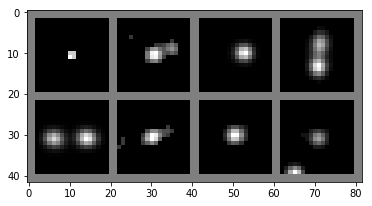

1  NOM 2  NOM 3  NOM 4  GRG
5  GRG 6  GRG 7  NOM 8  NOM


In [11]:
num = 4
# show images (data 1)
imshow(torchvision.utils.make_grid(images1_tr,nrow=num))
# print labels
for j in range(batch_size_train):
    if j%num == 0:
        print(' '.join('%1d%5s' % (j+1,classes[labels_tr[j]]) for j in range(j,j+num)))

Visualize random FIRST image sample


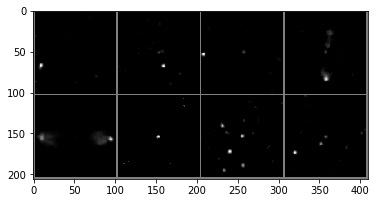

1  NOM 2  NOM 3  NOM 4  GRG
5  GRG 6  GRG 7  NOM 8  NOM


In [12]:
# show images (data 2)
imshow(torchvision.utils.make_grid(images2_tr,nrow=num))
# print labels
for j in range(batch_size_train):
    if j%num == 0:
        print(' '.join('%1d%5s' % (j+1,classes[labels_tr[j]]) for j in range(j,j+num)))

Sample **redshift**

In [13]:
redshift_tr.numpy()
# print labels
for j in range(batch_size_train):
    if j%num == 0:
        print(redshift_tr.numpy()[j:j+num])
        print(' '.join('%1d%5s' % (j+1,classes[labels_tr[j]]) for j in range(j,j+num)))

[[0.20827299]
 [0.221843  ]
 [0.36356801]
 [0.585     ]]
1  NOM 2  NOM 3  NOM 4  GRG
[[0.42      ]
 [0.392     ]
 [0.31697899]
 [0.31181699]]
5  GRG 6  GRG 7  NOM 8  NOM


Object id

In [14]:
for j in range(batch_size_train):
    if j%num == 0:
        print(object_id_tr[j:j+num])
        print(' '.join('%1d%5s' % (j+1,classes[labels_tr[j]]) for j in range(j,j+num)))

('RGZJ071714.8+402106', 'RGZJ021635.1+040718', 'RGZJ070836.8+475625', 'Dabhade20')
1  NOM 2  NOM 3  NOM 4  GRG
('KuzmiczJ1326+4934', 'Dabhade89', 'RGZJ005653.6+102010', 'RGZJ071547.2+521514')
5  GRG 6  GRG 7  NOM 8  NOM


Then get testing sample

In [15]:
dataiter = iter(testloader_visualize)
images1_te,images2_te, redshift_te, size_te, las_te, object_id_te, labels_te = dataiter.next()

Sample data sizes

In [16]:
print(np.shape(images1_te))
print(np.shape(images2_te))
print(np.shape(redshift_te))
print(np.shape(size_te))
print(np.shape(las_te))
print(np.shape(object_id_te))
print(np.shape(labels_te))

torch.Size([8, 1, 18, 18])
torch.Size([8, 1, 100, 100])
torch.Size([8, 1])
torch.Size([8, 1])
torch.Size([8, 1])
(8,)
torch.Size([8])


Visualize random NVSS image sample

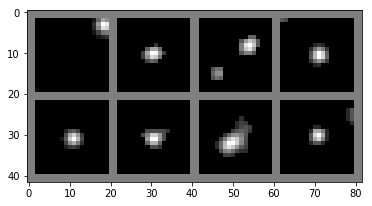

1  GRG 2  NOM 3  GRG 4  NOM
5  NOM 6  NOM 7  GRG 8  NOM


In [17]:
num = 4
# show images (data 1)
imshow(torchvision.utils.make_grid(images1_te,nrow=num))
# print labels
for j in range(batch_size_test):
    if j%num == 0:
        print(' '.join('%1d%5s' % (j+1,classes[labels_te[j]]) for j in range(j,j+num)))

Visualize random FIRST image sample


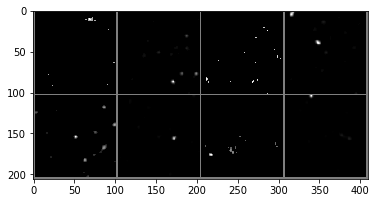

1  GRG 2  NOM 3  GRG 4  NOM
5  NOM 6  NOM 7  GRG 8  NOM


In [18]:
# show images (data 1)
imshow(torchvision.utils.make_grid(images2_te,nrow=num))
# print labels
for j in range(batch_size_test):
    if j%num == 0:
        print(' '.join('%1d%5s' % (j+1,classes[labels_te[j]]) for j in range(j,j+num)))

Sample **redshift**

In [19]:
# print labels
for j in range(batch_size_test):
    if j%num == 0:
        print(redshift_te.numpy()[j:j+num])
        print(' '.join('%1d%5s' % (j+1,classes[labels_te[j]]) for j in range(j,j+num)))

[[0.527   ]
 [0.263614]
 [0.509   ]
 [0.211988]]
1  GRG 2  NOM 3  GRG 4  NOM
[[0.34977001]
 [0.28621599]
 [0.393     ]
 [0.32853699]]
5  NOM 6  NOM 7  GRG 8  NOM


**Part 2**: Evaluation

1. Redshift vs. Size

In [20]:
train_eval = torch.utils.data.DataLoader(trainset, batch_size=600, shuffle=True, num_workers=2)
for i, data in enumerate(train_eval, 0):
    # get the inputs
    inputs1, inputs2, redshift,size,las,object_id,labels = data
    size_arr_train = np.reshape(size.numpy(),(600))
    z_arr_train = np.reshape(redshift.numpy(),(600))
    las_arr_train = np.reshape(las.numpy(),(600))
    label_arr_train = labels.numpy()
    object_id_train = object_id
test_eval = torch.utils.data.DataLoader(trainset, batch_size=200, shuffle=True, num_workers=2)
for i, data in enumerate(test_eval, 0):
    # get the inputs
    inputs1, inputs2, redshift,size,las,object_id,labels = data
    size_arr_test = np.reshape(size.numpy(),(200))
    z_arr_test = np.reshape(redshift.numpy(),(200))
    las_arr_test = np.reshape(las.numpy(),(200))
    label_arr_test = labels.numpy()
    object_id_test = object_id

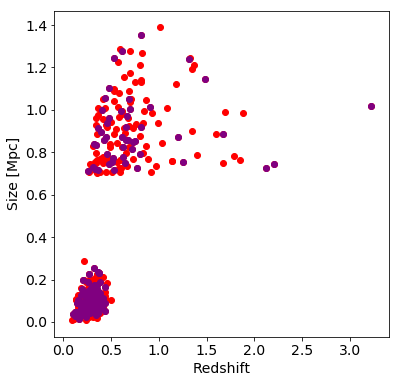

In [21]:
fig = plt.figure(figsize=(6,6))
plt.scatter(z_arr_train,size_arr_train,color='red')
plt.scatter(z_arr_test,size_arr_test,color='purple')
plt.xlabel('Redshift',fontsize=14)
plt.ylabel('Size [Mpc]',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Training set redshifts

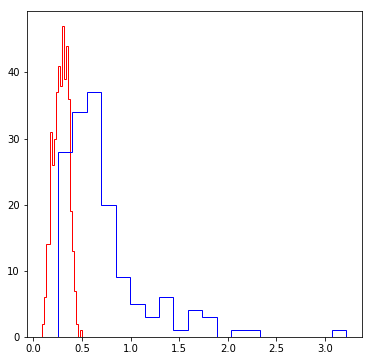

In [22]:
z_train_nom, z_train_grg = [],[]
for kk in range(len(z_arr_train)):
    if label_arr_train[kk] == 1:
        z_train_grg.append(z_arr_train[kk])
    elif label_arr_train[kk] == 0:
        z_train_nom.append(z_arr_train[kk])
fig = plt.figure(figsize=(6,6))
plt.hist(z_train_nom,bins=20,histtype='step',color='red')
plt.hist(z_train_grg,bins=20,histtype='step',color='blue')
plt.show()

Testing set redshifts

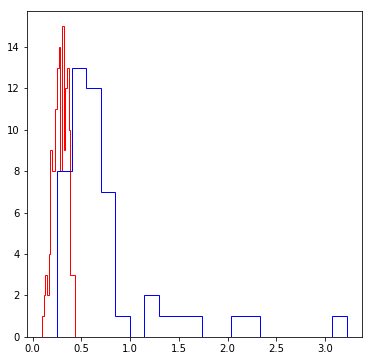

In [23]:
z_test_nom, z_test_grg = [],[]
for kk in range(len(z_arr_test)):
    if label_arr_test[kk] == 1:
        z_test_grg.append(z_arr_test[kk])
    elif label_arr_test[kk] == 0:
        z_test_nom.append(z_arr_test[kk])
fig = plt.figure(figsize=(6,6))
plt.hist(z_test_nom,bins=20,histtype='step',color='red')
plt.hist(z_test_grg,bins=20,histtype='step',color='blue')
plt.show()

2. las vs. redshift

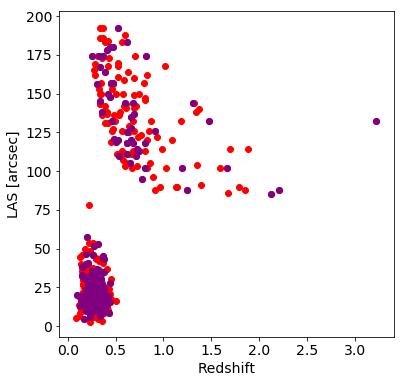

In [24]:
fig = plt.figure(figsize=(6,6))
plt.scatter(z_arr_train,las_arr_train,color='red')
plt.scatter(z_arr_test,las_arr_test,color='purple')
plt.xlabel('Redshift',fontsize=14)
plt.ylabel('LAS [arcsec]',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Training set LAS

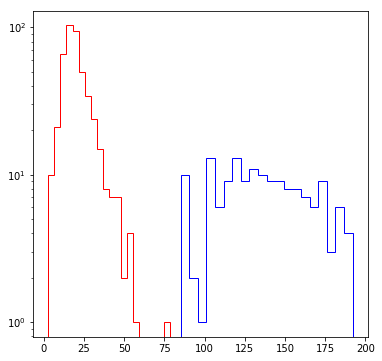

In [25]:
las_train_nom, las_train_grg = [],[]
for kk in range(len(las_arr_train)):
    if label_arr_train[kk] == 1:
        las_train_grg.append(las_arr_train[kk])
    elif label_arr_train[kk] == 0:
        las_train_nom.append(las_arr_train[kk])
fig = plt.figure(figsize=(6,6))
plt.hist(las_train_nom,bins=20,histtype='step',color='red')
plt.hist(las_train_grg,bins=20,histtype='step',color='blue')
plt.yscale('log')
plt.show()

Testing set LAS

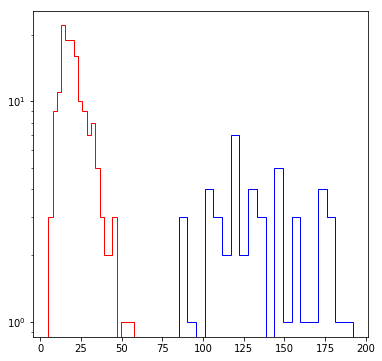

In [26]:
las_test_nom, las_test_grg = [],[]
for kk in range(len(las_arr_test)):
    if label_arr_test[kk] == 1:
        las_test_grg.append(las_arr_test[kk])
    elif label_arr_test[kk] == 0:
        las_test_nom.append(las_arr_test[kk])
fig = plt.figure(figsize=(6,6))
plt.hist(las_test_nom,bins=20,histtype='step',color='red')
plt.hist(las_test_grg,bins=20,histtype='step',color='blue')
plt.yscale('log')
plt.show()

LAS (Total)

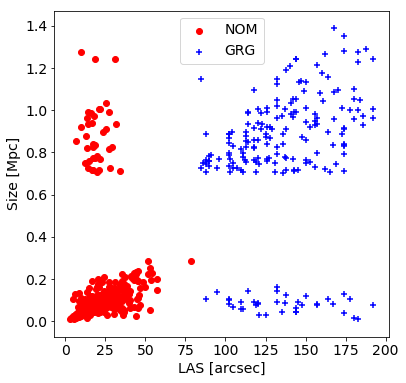

In [27]:
las_nom, las_grg = [],[]
size_nom, size_grg = [],[]
# Train set
for kk in range(len(las_arr_train)):
    if label_arr_train[kk] == 1:
        las_grg.append(las_arr_train[kk])
        size_grg.append(size_arr_train[kk])
    elif label_arr_train[kk] == 0:
        las_nom.append(las_arr_train[kk])
        size_nom.append(size_arr_train[kk])
# Test_set
for kk in range(len(las_arr_test)):
    if label_arr_test[kk] == 1:
        las_grg.append(las_arr_test[kk])
        size_grg.append(size_arr_train[kk])
    elif label_arr_test[kk] == 0:
        las_nom.append(las_arr_test[kk])
        size_nom.append(size_arr_train[kk])
fig = plt.figure(figsize=(6,6))
plt.scatter(las_nom,size_nom,marker='o',color='red',label='NOM')
plt.scatter(las_grg,size_grg,marker='+',color='blue',label='GRG')
plt.xlabel('LAS [arcsec]',fontsize=14)
plt.ylabel('Size [Mpc]',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best',fontsize=14)
plt.show()

Source size (Total)

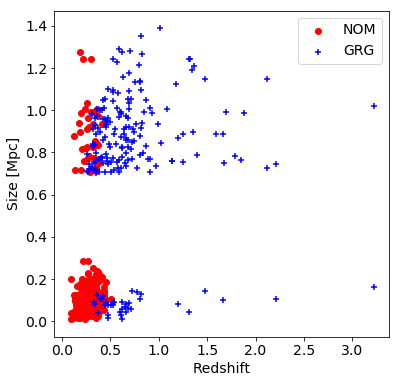

In [28]:
z_nom, z_grg = [],[]
# Train set
for kk in range(len(z_arr_train)):
    if label_arr_train[kk] == 1:
        z_grg.append(z_arr_train[kk])
    elif label_arr_train[kk] == 0:
        z_nom.append(z_arr_train[kk])
# Test_set
for kk in range(len(z_arr_test)):
    if label_arr_test[kk] == 1:
        z_grg.append(z_arr_test[kk])
    elif label_arr_test[kk] == 0:
        z_nom.append(z_arr_test[kk])
fig = plt.figure(figsize=(6,6))
plt.scatter(z_nom,size_nom,marker='o',color='red',label='NOM')
plt.scatter(z_grg,size_grg,marker='+',color='blue',label='GRG')
plt.legend(loc='best',fontsize=14)
plt.xlabel('Redshift',fontsize=14)
plt.ylabel('Size [Mpc]',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Stack Together

0.089047 0.5022979999999999
0.254 3.22


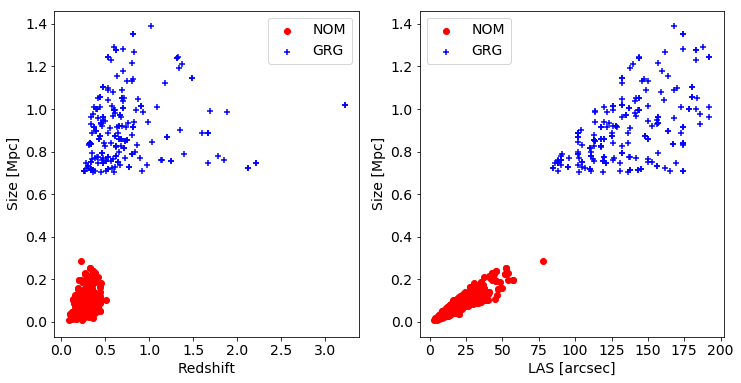

In [29]:
z_nom,z_grg = [],[]
las_nom,las_grg = [],[]
size_nom,size_grg = [],[]
# train set
for kk in range(len(size_arr_train)):
    if size_arr_train[kk] <= 0.5:
        size_nom.append(size_arr_train[kk])
        z_nom.append(z_arr_train[kk])
        las_nom.append(las_arr_train[kk])
    else:
        size_grg.append(size_arr_train[kk])
        z_grg.append(z_arr_train[kk])
        las_grg.append(las_arr_train[kk])
# test set
for kk in range(len(size_arr_test)):
    if size_arr_test[kk] <= 0.5:
        size_nom.append(size_arr_test[kk])
        z_nom.append(z_arr_test[kk])
        las_nom.append(las_arr_test[kk])
    else:
        size_grg.append(size_arr_test[kk])
        z_grg.append(z_arr_test[kk])
        las_grg.append(las_arr_test[kk])

fig = plt.figure(figsize=(12,6))
# Redshift vs. Source Size
plt.subplot(121)
plt.scatter(z_nom,size_nom,marker='o',color='red',label='NOM')
plt.scatter(z_grg,size_grg,marker='+',color='blue',label='GRG')
plt.legend(loc='best',fontsize=14)
plt.xlabel('Redshift',fontsize=14)
plt.ylabel('Size [Mpc]',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# LAS vs. Source Size
plt.subplot(122)
plt.scatter(las_nom,size_nom,marker='o',color='red',label='NOM')
plt.scatter(las_grg,size_grg,marker='+',color='blue',label='GRG')
plt.xlabel('LAS [arcsec]',fontsize=14)
plt.ylabel('Size [Mpc]',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best',fontsize=14)
plt.savefig('GRGNOM_main_parameter_class_diff.png')
#plt.show()

print(min(z_nom),max(z_nom))
print(min(z_grg),max(z_grg))

# GRG catalogue distribution

In [30]:
GRG_train_id, GRG_test_id = [],[]
Kuz_train_num,Kuz_test_num = 0, 0
Dab_train_num,Dab_test_num = 0, 0
# GRG in the training set
for element in object_id_train:
    if 'Kuz' in element:
        GRG_train_id.append(element)
        Kuz_train_num += 1
    elif'Dab' in element:
        GRG_train_id.append(element)
        Dab_train_num += 1
# GRG in the testing set
for element in object_id_test:
    if 'Kuz' in element:
        GRG_test_id.append(element)
        Kuz_test_num += 1
    elif 'Dab' in element:
        GRG_test_id.append(element)
        Dab_test_num += 1

In [31]:
print(f'Training set has {Kuz_train_num} Kuzmicz sample, along with {Dab_train_num} Dabhade sample.')
print(f'Testing set has {Kuz_test_num} Kuzmicz sample, along with {Dab_test_num} Dabhade sample.')

Training set has 52 Kuzmicz sample, along with 101 Dabhade sample.
Testing set has 15 Kuzmicz sample, along with 34 Dabhade sample.


In [32]:
train_ratio = Kuz_train_num/Dab_train_num
test_ratio = Kuz_test_num/Dab_test_num
print(train_ratio,test_ratio)

0.5148514851485149 0.4411764705882353


# Visualize Kuzmicz Testing samples

In [33]:
Kuz_GRG_test = [i for i in GRG_test_id if 'Kuzmicz' in i]
print(Kuz_GRG_test)

['KuzmiczJ1344+3317', 'KuzmiczJ1235+2120', 'KuzmiczJ1543-0112', 'KuzmiczJ1235+3925', 'KuzmiczJ1327+1748', 'KuzmiczJ1706+4340', 'KuzmiczJ1702+4217', 'KuzmiczJ1030+5310', 'KuzmiczJ1511+0751', 'KuzmiczJ1304+2454', 'KuzmiczJ1353+2631', 'KuzmiczJ0812+3031', 'KuzmiczJ1412+4212', 'KuzmiczJ1604+3731', 'KuzmiczJ0809+2912']
